In [1]:
import tensorflow as tf

print(tf.__version__)

1.15.0


In [2]:
# constants and running a session
# 1. define computational graph
# we will define constant tensors with tf.constant
# 상수는 값이 고정된 것을 말하며 숫자, 문자를 상수로 선언합니다.
a = tf.constant(5, name='a') # 값이 변하지 않음.. constants whose value don't change
b = tf.constant(3, name='b')
result = tf.add(a,b, name='add_a_b')
result



<tf.Tensor 'add_a_b:0' shape=() dtype=int32>

In [3]:
# 2. run the computational graph
sess = tf.Session() # session takes a computational graph or part of graph and execute it
# session also holds the intermediate values and the results of preforming the computation.
print(result)
sess.run(result)
#심벌릭으로 표현된 수식을 계산하기 위해서 세션을 생성해야 합니다. tf.Session 클래스는 
#텐서플로우의 오퍼레이션, 즉 노드를 실행하기 위한 클래스입니다. 
#Session() 함수를 통해 세션을 생성함으로써 프로그램은 Tensorflow 라이브러리와 
#연결이 됩니다. 즉, Session을 생성하여 run() 메서드를 호출할 때 심벌릭 코드가 실제 
#실행됩니다.

#print(result) 수행하면 예상과 달리 자료형이 출력된다. Tensor형이며, 데이터
#타입은 int(32)를 의미며, shape은 0차원 상수를 의미한다.
# Session을 생성하여 run 메소드를 호출해야 실제로 실행되어서 8을 출력한다.

Tensor("add_a_b:0", shape=(), dtype=int32)


8

In [ ]:
#Variables and Placeholders
# Since in machine learning we want to update the parameters of the models when training
# simply using constants whose values don't change is not enough,
# we need some mechanism to add trainable parameters to the computational graph.
# In tensorflow we accomplish it using variables.
# Variables requires us to specify an initial value and the data type.
# We create variables with the tf.variable op

# A graph can also be fed external inputs using placeholders so that we can feed 
# arbitrary number of inputs from the training sets to the model.
# Placeholders act like tensor objects that do not have their values specified and
# are created using the op tf.placeholder.

# placeholder values must be fed when we run them. We can use sess.run method's
# feed_dict argument to feed the values to the placeholders.
# we have to specify the shape and datatype of the placeholder when we add them 
# to the graph. A shape of None indicates that the placeholder can get any
# arbitrary input.
#placeholder()의 세 번째 매개변수를 [None]으로 설정하면 Shape을 Dynamic으로 설정되며 
#feed_dict() 정의할 때 데이터 크기를 제약 없이 입력할 수 있습니다.

# feed_dict is a just a dictionary that maps graph elements like variables, constants
# or placeholders to values. We use it to overwrite the existing values of tensors.
# We can also use it to change variable values when running them.

#변수란 상수와 반대로 값이 변하는 것을 말하며 숫자, 문자, 문장, 파일을 변수의 
#내용으로 가질 수 있습니다. 변수는 그래프를 최적화하는 용도로 사용되며,  
#텐서플로우가 학습한 결과를 갱신하기 위해 사용됩니다. 변수를 사용하려면 데이터 
#그래프를 구성한 후 run() 함수를 실행하기 전에 반드시 초기화해야 합니다. 
#tf.initialize_all_variable()가 변수를 초기화 시킵니다.
#tf.global_variables_initializer()로 변수를 초기화시킨다.

#변수값도 feed_dict를 이용하여 계산시 입력 값으로 적용할 수 있다.

#심벌릭 변수 placeholder는 그래프에 사용할 입력값을 나중에 받기 위해 사용되며, 
#프로그램 실행 중에 데이터를 변경할 수 있습니다. 텐서의 자료형, 구조 및 이름을 
#매개변수로 설정합니다. feed_dict() 의 매개변수로 전달합니다.

In [4]:
c = tf.Variable(3, dtype=tf.float32) # c는 3 으로 설정한다.
result2 = tf.add(tf.cast(result, tf.float32), c)
d = tf.placeholder(dtype=tf.float32, shape=None) # d placeholder는 특정값으로 초기화
# 하지 않는다.

In [ ]:
# Unlike constants, variables are not initialized when we call tf.Variable.
# We will have to run a special operation called tf.global_variable_initializer to
# initialize the variable by a session.

In [5]:
sess.run(tf.global_variables_initializer()) # 변수 variables가 초기화된다.
print(sess.run(c)) # c가 가지는 처음값....
print('first add result:',sess.run(result2)) # c가 가지는 처음값으로 적용해서 result2 계산
print(sess.run(c, feed_dict={c:14})) # feed_dict 파라메터로 c 값을 14로 변경
print('result=',sess.run(result))
print('c=',sess.run(c)) # c가 위의 feed_dict로 적용한 값으로 변경되는 것이 아니라,
# 원래 값으로 돌아간다..
result3 = tf.add(tf.cast(result, tf.float32), c) # result int32--> float32로 변경
print('after feed_dict, add result:', sess.run(result3))
print('feed c variable,  add result :',sess.run(result3, feed_dict={c:14}))
print(sess.run(d, feed_dict={d:[1,1,3,5]})) # feed_dict 파라메터를 이용하여 리스트를배정

# feed_dict을 적용할 때 그때만 값이 변경되어서, 그 때만 적용된다.
# 지나면 원래 값으로 돌아간다? 이예에서 c 값을 주의해서 봐라..

3.0
first add result: 11.0
14.0
result= 8
c= 3.0
after feed_dict, add result: 11.0
feed c variable,  add result : 22.0
[1. 1. 3. 5.]


In [ ]:
# Tensorboard
# tensorboard is a visualization tool that comes packaged with tensorflow.
#It's very useful to visualize large scale machine learning models to debug them
#and understand what's going on under the hood.
# With tensorboard we can also track our loss metrics and other values to see how 
#they are changing over training steps.
#For using tensorboard, we can save our graphs with by writing summaries about them
#with summary writers. Summaries are like condensed information about models.
#Tensorboard creates visualizations out of this information.

# sess.graph containes the default computational graph for this session and writer
# writes it into the directory provided in logdir parameter.


In [6]:
writer = tf.summary.FileWriter(logdir='./first_graph', graph=sess.graph)
writer.close()

In [7]:
# Linear regression from scratch
#Model parameters
W = tf.Variable([3.0], name='weight')
b = tf.Variable([-2.0], name='bias')

In [8]:
#We create two placeholders X and y for the training set and labels. We'll
#feed the inputs to them during training

#Model inputs

# training data
X = tf.placeholder(tf.float32)
# y
Y = tf.placeholder(tf.float32)

In [9]:
# Model definition
predictions = W*X+b

In [ ]:
# We'll use sum of squared errors as our loss function. To implement it,
# for each instance we calculate the error first. Error is the difference
#between the prediction we get from the model and the original values
#we were supposed to get.Then we square the error and add them up.
#Since we are summing the squared errors or residuals(another name for
#errors) it's also called the OLS or ordinary least squares method.
#Note that errors are calculated for each sample or instance, while the
#loss tells us how good our model is performaing on the whole dataset.

In [10]:
# loss function. Here we use sum of squared erros.
loss = tf.reduce_sum(tf.square(predictions-Y))

In [ ]:
#Optimizers are used for finding the best value for some parameters with
#respect to some loss function in machine learning models. There's many
#kind of optimizers, the one we are using here is called Gradient Descent.
#We start with a random value for the weight and the bias. The optimzer 
#updates the weight and the bias parameter in a direction(increasing or 
#decreasing the numbers) to minimize the value of the loss. We also provide
#a learning rate to use as a scale factor while updating.

In [11]:
#training op
train = tf.train.GradientDescentOptimizer(0.001).minimize(loss)

In [ ]:
#We create some random values for training set and label and feed them into
#the model during running the code. As before we initialize all our variables
#before running them using global_variables_initializer.
#We run the model for 2000 steps here

In [12]:
# train data
x = [1.1, 2.0, 3.5, 4.8]
y = [2.0, 3.4, 4.2, 5.1]

sess.run(tf.global_variables_initializer())
for train_step in range(2000):
    sess.run(train, {X:x, Y:y})

In [13]:
weight, bias, loss = sess.run([W, b, loss], {X:x, Y:y})
print("W: %s b: %s loss: %s"%(weight, bias, loss))

W: [0.8422483] b: [1.2378168] loss: 0.2880003


In [ ]:
# Introducing Tensorflow Estimators
# estimators is a high level api integrated with tensorflow that allows us
# to work with pre-implemented models and provides tools for quickly creating
# new models as need by customizing them.
#The interface is lossely scikit-learn inspired and follows a train-evaluate-
#predict loop similar to scikit-learn.
#Estimator is the base class, canned estimators or pre-implemented models are
#the sub-class.
#We are using the canned estimators in this tutorial.

In [ ]:
#Estimators deal with all the details of creating computational graphs,
#initializing variables, training the model and saving checkpoint and 
#logging files for tensorboard behind the scene.
#But to work with the estimators, we've to become comfortable with two new
#concepts, feature columns and input functions.
#input functions are used for passing input data to the model for training
#and evaluation.
#Feature columns are specifications for how the model should interpret the 
#input data.

# since we are going to learn via doing, we can start analyzing from beginning
# where we are now and where we have to go.

# we have some training data on airbnb rental pricings and their prices.
# we want to predict the prices of those rentals from the features in the dataset.
# we also know that we need a machine learning model to do that.
# Tensorflow is offering pre-made model implementations for doing it and 
# giving functionalities for representing our features in different ways using the
# feature columns.

# We just need to build an input function and send our data to the estimator.
# feature columns will connect the data from the input function to the estimators
#for training and evaluating the model.

# general workflow for Canned Estimators will be to follow these steps:
# 1. Loading the libraries and dataset
# 2. Data preprocessing
# 3. Defining the feature columns
# 4. Building input function.
# 5. Model instantiation, training and evaluation.
# 6. Generating prediction
# 7. Visualizing the model and the loss metrics using Tensorboard

In [21]:
#1. Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

plt.style.use('seaborn-colorblind')
%matplotlib inline

# only displays the most important warnings
tf.logging.set_verbosity(tf.logging.FATAL)

In [ ]:
# Data Overview
# the dataset has 3585 rows and 95 columns. however we will only use
# a subset of the features. These features will be used:
# property_type : categorical, describes the type of the property
# room_type :  categorical, describes the type of the room
# bathrooms : number of bathrooms
# bedrooms :  number of bedrooms
# beds :  number of beds.
# bed_type :  type of the bed in listing. Categorical feature
# accommodates :  number of people the rental will accomodate
# host_total_listing_count : number of listings posted by the host.
# number_of_reviews : number of reviews received by the rental
# review_scores_value: Average value of the reviews for this listing.
# neighbourhood_cleansed : categorical feature. describes the neighbourhood of the rental
# cleaning_fee :  cleaning fee for the rental
# minimum_nights :  Minimum nights the guest must stay to be considered for rental
# security_deposit :  amount of security deposit the guest has to pay to the
# host before renting
# host_is_superhost: categorical, True if the host is a superhost. False otherwise
# instant_bookable :  categorical. True if the rental is instantly bookable. False otherwise
# price : Continuous target variable for the regression task


In [22]:
# Now we'll load the dataset with pandas. Tensorflow integrates well 
# with pandas and provides many useful functions to work with it.

used_features = ['property_type'
                 ,'room_type'
                 ,'bathrooms'
                 ,'bedrooms'
                 ,'beds'
                 ,'bed_type'
                 ,'accommodates'
                 ,'host_total_listings_count'
                 ,'number_of_reviews'
                 ,'review_scores_value'
                 ,'neighbourhood_cleansed'
                 ,'cleaning_fee'
                 ,'minimum_nights'
                 ,'security_deposit'
                 ,'host_is_superhost'
                 ,'instant_bookable'
                 ,'price'
                ]

boston = pd.read_csv('./data/boston_airbnb/listings.csv',
                    usecols=used_features)
print(boston.shape)
boston.head()

(3585, 17)


,host_is_superhost,host_total_listings_count,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,minimum_nights,number_of_reviews,review_scores_value,instant_bookable
0,f,1,Roslindale,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,$250.00,NaN,$35.00,2,0,NaN,f
1,f,1,Roslindale,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,$65.00,$95.00,$10.00,2,36,9.0,t
2,t,1,Roslindale,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,$65.00,NaN,NaN,3,41,10.0,f
3,f,1,Roslindale,House,Private room,4,1.0,1.0,2.0,Real Bed,$75.00,$100.00,$50.00,1,1,10.0,f
4,t,1,Roslindale,House,Private room,2,1.5,1.0,2.0,Real Bed,$79.00,NaN,$15.00,2,29,10.0,f


In [ ]:
# 2. Data preprocessing
# to use the features in our tensorflow model, we need to convert them to Tensors.
# But before that we need to take some more data cleaning steps to prepare our data
# for machine learning.
# Here's brief overview of the cleaning steps.

# price, security_deposit and cleaning_fee are numbers, but they are loaded as stings.
# These numbers also contain some non-numeric characters ($ and ,).
# We'll remove the non-numberic characters from the features, convert them to float 
# and fill the missing values with the median value of each feature.

#Similarly, some other features like bathroom, bed has some missing values which are
#also filled with the median

# property_type is a categorical variable. The missing values are filled with the most
# common category Apartment.

In [23]:
for feature in ['cleaning_fee', 'security_deposit', 'price']:
    boston[feature]=boston[feature].map(lambda x:x.replace('$', '').replace(',',''),
                                       na_action='ignore')
    boston[feature]=boston[feature].astype(float)
    boston[feature].fillna(boston[feature].median(), inplace=True)
    
for feature in ['bathrooms', 'bedrooms', 'beds', 'review_scores_value']:
    boston[feature].fillna(boston[feature].median(), inplace=True)
    
boston['property_type'].fillna('Apartment', inplace=True)

In [24]:
boston

,host_is_superhost,host_total_listings_count,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,minimum_nights,number_of_reviews,review_scores_value,instant_bookable
0,f,1,Roslindale,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,250.0,250.0,35.0,2,0,9.0,f
1,f,1,Roslindale,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,65.0,95.0,10.0,2,36,9.0,t
2,t,1,Roslindale,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,65.0,250.0,50.0,3,41,10.0,f
3,f,1,Roslindale,House,Private room,4,1.0,1.0,2.0,Real Bed,75.0,100.0,50.0,1,1,10.0,f
4,t,1,Roslindale,House,Private room,2,1.5,1.0,2.0,Real Bed,79.0,250.0,15.0,2,29,10.0,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,f,28,Charlestown,Apartment,Private room,3,1.0,1.0,1.0,Real Bed,69.0,95.0,50.0,2,4,9.0,t
3581,f,2,Allston,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,150.0,100.0,15.0,3,0,9.0,f
3582,f,1,Charlestown,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,198.0,250.0,50.0,3,0,9.0,f
3583,f,4,Charlestown,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,65.0,100.0,50.0,1,2,7.0,f


In [25]:
boston['price']

0       250.0
1        65.0
2        65.0
3        75.0
4        79.0
        ...  
3580     69.0
3581    150.0
3582    198.0
3583     65.0
3584     65.0
Name: price, Length: 3585, dtype: float64

Text(0.5, 1.0, 'Price histogram before subsetting and log-transformation')

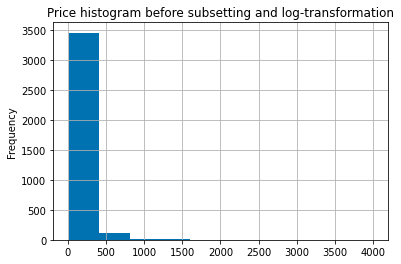

In [26]:
# before moving on to other features, we check our target variable price

boston['price'].plot(kind='hist', grid=True)
plt.title('Price histogram before subsetting and log-transformation')

In [27]:
boston['price'].skew()

8.521483565683951

In [ ]:
# prices are heavily skewed in this dataset. In the histogram we can also see most of 
# the data falls under 500. So we'll use a subset of our dataset where the price range
# from 50-500 for now to remove very large and very small prices. We'll also log-transform
# the target variable to reduce skewness.

In [28]:
boston =  boston[(boston['price']>50)&(boston['price']<500)]
boston

,host_is_superhost,host_total_listings_count,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,minimum_nights,number_of_reviews,review_scores_value,instant_bookable
0,f,1,Roslindale,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,250.0,250.0,35.0,2,0,9.0,f
1,f,1,Roslindale,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,65.0,95.0,10.0,2,36,9.0,t
2,t,1,Roslindale,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,65.0,250.0,50.0,3,41,10.0,f
3,f,1,Roslindale,House,Private room,4,1.0,1.0,2.0,Real Bed,75.0,100.0,50.0,1,1,10.0,f
4,t,1,Roslindale,House,Private room,2,1.5,1.0,2.0,Real Bed,79.0,250.0,15.0,2,29,10.0,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,f,28,Charlestown,Apartment,Private room,3,1.0,1.0,1.0,Real Bed,69.0,95.0,50.0,2,4,9.0,t
3581,f,2,Allston,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,150.0,100.0,15.0,3,0,9.0,f
3582,f,1,Charlestown,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,198.0,250.0,50.0,3,0,9.0,f
3583,f,4,Charlestown,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,65.0,100.0,50.0,1,2,7.0,f


In [29]:
boston.price

0       250.0
1        65.0
2        65.0
3        75.0
4        79.0
        ...  
3580     69.0
3581    150.0
3582    198.0
3583     65.0
3584     65.0
Name: price, Length: 3269, dtype: float64

Text(0.5, 1.0, 'price distribution after the subsetting and log-transformation')

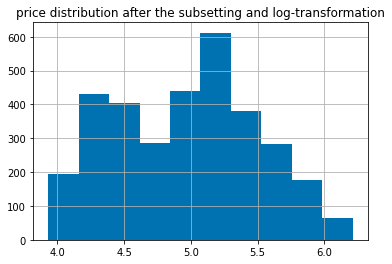

In [30]:
#boston =  boston[(boston['price']>50)&(boston['price']<500)]
target = np.log(boston.price)
target.hist()
plt.title('price distribution after the subsetting and log-transformation')

In [31]:
target

0       5.521461
1       4.174387
2       4.174387
3       4.317488
4       4.369448
          ...   
3580    4.234107
3581    5.010635
3582    5.288267
3583    4.174387
3584    4.174387
Name: price, Length: 3269, dtype: float64

In [32]:
features =  boston.drop('price', axis=1)
features.head()

,host_is_superhost,host_total_listings_count,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,security_deposit,cleaning_fee,minimum_nights,number_of_reviews,review_scores_value,instant_bookable
0,f,1,Roslindale,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,250.0,35.0,2,0,9.0,f
1,f,1,Roslindale,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,95.0,10.0,2,36,9.0,t
2,t,1,Roslindale,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,250.0,50.0,3,41,10.0,f
3,f,1,Roslindale,House,Private room,4,1.0,1.0,2.0,Real Bed,100.0,50.0,1,1,10.0,f
4,t,1,Roslindale,House,Private room,2,1.5,1.0,2.0,Real Bed,250.0,15.0,2,29,10.0,f


In [33]:
features

,host_is_superhost,host_total_listings_count,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,security_deposit,cleaning_fee,minimum_nights,number_of_reviews,review_scores_value,instant_bookable
0,f,1,Roslindale,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,250.0,35.0,2,0,9.0,f
1,f,1,Roslindale,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,95.0,10.0,2,36,9.0,t
2,t,1,Roslindale,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,250.0,50.0,3,41,10.0,f
3,f,1,Roslindale,House,Private room,4,1.0,1.0,2.0,Real Bed,100.0,50.0,1,1,10.0,f
4,t,1,Roslindale,House,Private room,2,1.5,1.0,2.0,Real Bed,250.0,15.0,2,29,10.0,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,f,28,Charlestown,Apartment,Private room,3,1.0,1.0,1.0,Real Bed,95.0,50.0,2,4,9.0,t
3581,f,2,Allston,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,100.0,15.0,3,0,9.0,f
3582,f,1,Charlestown,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,250.0,50.0,3,0,9.0,f
3583,f,4,Charlestown,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,100.0,50.0,1,2,7.0,f


In [ ]:
# split the data into train and test set
# Now that we have our features and the target, we can use scikit-learn to split the data
# for convinience. Scikit-learn provides a train_test_split function for splitting a pandas
# DataFrame into a training and testing set.

# train_test_split accepts the features and the target as parameters and returns the randomly
# shuffled data. We have set 33% of the data in the test set and the rest are in training set.
# The test_size parameter controls what portion of the data should be in the test set.
# We also set a random_state for reproducability.

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.33, random_state=42)

In [35]:
print(X_train, X_test, y_train, y_test)

     host_is_superhost  host_total_listings_count neighbourhood_cleansed  \
3572                 f                        363                Allston   
386                  f                          1          Jamaica Plain   
675                  f                          7              North End   
1211                 t                          1              South End   
2027                 f                        363               Downtown   
...                ...                        ...                    ...   
1190                 f                          1              South End   
1225                 f                          1              South End   
1393                 f                          1               Back Bay   
944                  f                          1              South End   
3477                 f                          1                Allston   

     property_type        room_type  accommodates  bathrooms  bedrooms  beds  \
3572   

In [ ]:
# introducing feature columns
#Generally, machine learning models take numbers as input and outputs numbers for efficient 
#implementation. In tensorflow, the models take Dense Tensors as input and outputs Dense Tensors.
#But real world datasets have sparse feature like product id, category, location, video id
#etc.
#For large datasets, converting each of the categorical featurs to numerical representations
#often consume a huge amount of time and the process is also error prone.
#There are also other feature preprocessing steps like bucketization, scaling, cross features,
#embedding etc people often take before feeding the data to the models.

# To simplify this process Tensorflow offers FeatureColumn abstraction.

# When we instantiate a canned estimator we have to pass it a list of FeatureColumns for
#the feature_column parameter. FeatureColumns handle the conversion of the sparse or dense
#(numerical) features to a dense Tensor usable by the core model.

# The type of Feature column to use depends on the feature type and the model type.
# Feature type : numerical and categorical features need to be handled differently
# Model type: Linear models and the neural network models handle categorical features differently


# First we'll separate the column names of the numeric features and the categorical features


In [46]:
# Get all the numeric feature names
numeric_columns = ['host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 
                   'beds', 'security_deposit', 'cleaning_fee', 'minimum_nights',
                   'number_of_reviews', 'review_scores_value']

# Get all the categorical feature names that contains strings
categorical_columns=['host_is_superhost', 'neighbourhood_cleansed', 'property_type',
                     'room_type', 'bed_type', 'instant_bookable']


In [47]:
print(len(numeric_columns), len(categorical_columns))

10 6


In [ ]:
# Numeric Feature Columns
# numeric features can be represented by numeric_column which is used for real valued features.
# When we create a numeric_column we have to pass a unique string to its e key parameter.
# the value of key will be used as the name of the column.
#We can also specify the data type or shape of the numeric_column if necessary, but
#here we will just use the defaults.

In [48]:
numeric_features=[tf.feature_column.numeric_column(key=column) for column in numeric_columns]
print(numeric_features[0])

NumericColumn(key='host_total_listings_count', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)


In [ ]:
# Categorical Feature Columns
# There are many ways to handle categorical features in tensorflow. 
# categorical_column_with_vocabulary_list is just one of them. For small number of categories
# we give the categorical column the fixed list of values the column will take. It represents 
# each categorical feature in it's one-hot vector representation.

# in the one-hot representation we replace each categorial instance with a n-dimensional boolean 
# vector which has the size of the number of categories in the feature and marks the presence and
# absence of each category with 1 and 0. For example if we have a feature 'Gender' with two 
#categories {male, female}, each time we see 'male' we will replace it with a vector [1,0]
#and each time we see 'female' we will replace it with a vector [0,1].

# categorical_column_with_vocabulary_list must have following inputs:
# key : a unique string identifying the input feature which would be used as the name of the column
# vocabulary_list : An ordered list defining the possible values for this categorical feature

In [ ]:
# syntax example....
Property_type = ['apartment', 'condo', 'aparatment', 'villa', 'house','house','condo']
gender_column = tf.feature_column.categorical_column_with_vocabulary_list(key='Property_type',
                    vocabulary_list=['house', 'apartment', 'condo', 'villa'])

In [49]:
categorical_features = [tf.feature_column.categorical_column_with_vocabulary_list(key=column,
                            vocabulary_list=features[column].unique()) for column in categorical_columns]
# features[column].unique() returns a list containing all the unique values the
# categorical feature may take and we set vocabulary_list parameter to those values.
print(categorical_features[3])

VocabularyListCategoricalColumn(key='room_type', vocabulary_list=('Entire home/apt', 'Private room', 'Shared room'), dtype=tf.string, default_value=-1, num_oov_buckets=0)


In [ ]:
# combine all the numeric and the categorical feature columns to one list so that we can pass
# it to our canned estimator

In [50]:
linear_features = numeric_features+categorical_features

In [51]:
print(linear_features)

[NumericColumn(key='host_total_listings_count', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='accommodates', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='bathrooms', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='bedrooms', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='beds', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='security_deposit', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='cleaning_fee', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='minimum_nights', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='number_of_reviews', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='review_scores_value', shap

In [ ]:
# Build Input Function
# When we train our model we have to pass the features and the labels to the model.
# Estimators require that we use an input function for this.

# The input fucntion must return a tuple containing two elements.
# 1. A dictionary that contains the feature column names as key and map them to the tensors 
#    containing the feature data for a training batch
# 2. A list of labels for the training batch

# the structure of an input function looks like this:
# def my_input_fn():
#    # preprocess your data here...
#
#    # ... then return 1) a mapping of feature columns to Tensor with the corresponding
#    # feature data, and 2) a Tensor containing labels
#
#    return feature_cols, labels

In [ ]:
# luckily tensorflow provides functionality for feeding a pandas dataframe straight 
# into a tensorflow estimator with the pandas_input_fn function.
# pandas_input_fn  has many parameters but we will use the following.
# x: pandas dataframe object that has the features
# y: pandas series objet that has the labels
# batch_size : a number specifying the batch size
# shuffle :  boolean. whether to shuffle the data or not
# num_epoch :  int. number of epoches to iterate over the data. one epoch means going over
# all the training data once. None means it will cycle through input data forever.
#
# note that pandas_input_fn returns an input function that would feed the data to the tensroflow
# model. Here we create two input functions training_input_fn and eval_input_fn that takes the
# training and test set features and labels respectively.
#

# num_epoch is set to None in the training_input_fn because we want to go over the training 
# dataset multiple times as the model trains. We want to go over the test dataset only once to
# evaluate the model, so we set num_epoch to 1.


In [52]:
# Create training input function
training_input_fn = tf.estimator.inputs.pandas_input_fn(
    x=X_train,
    y=y_train,
    batch_size=32,
    shuffle=True,
    num_epochs = None
)

# Create testing input function
eval_input_fn = tf.estimator.inputs.pandas_input_fn(
    x=X_test,
    y=y_test,
    batch_size=32,
    shuffle = False,
    num_epochs=1
)

In [ ]:
# Instantiate Model
# We instantiate the linear model by passing the list containing the feature columns to
# the feature_columns parameter. We also specify a model directory with the model_dir parameter
# where tensorflow will store the model graph and other information. we will be able to 
# visualize the model architecture and the loss metrics later with tensorboard using them

#
# We can choose different optimizers by using the optimizer parameter, but we'll go with 
#the default here. The default loss function is sum of squared errors. If you want to
# customize the loss function or extend other properties, you can check out 
# creating estimators in tensorflow guide.

In [53]:
linear_regressor=tf.estimator.LinearRegressor(feature_columns=linear_features,
                                             model_dir='./linear_regressor')

In [ ]:
# Train Model
# We pass the training_input_fn to the input_fn parameter of the train method and 
# specify the number of steps we want to train the model.
# Note that we have to pass the function object (input_fn=training_input_fn) to the
# input_fn parameter, 
# not the return value of the function call(input_fn=training_input_fn())

In [54]:
linear_regressor.train(input_fn=training_input_fn, steps=2000)

In [ ]:
# Evaluate Model
# For evaluating the model we simply pass the eval_input_fn to the input_fn parameter in regressor.evaluate
# method as we did earlier with the train method.
# It returns a dict containing loss after evaluating the model on the test set.
# Currently loss is defined as mean squared error(MSE) in the LinearRegressor model.
# If you want to build your own estimator see this tensorflow guide.

In [55]:
linear_regressor.evaluate(input_fn=eval_input_fn)

{'average_loss': 0.14767084,
 'label/mean': 4.9762683,
 'loss': 4.6863775,
 'prediction/mean': 4.8573866,
 'global_step': 2000}

In [ ]:
# LinearRegressor.predict method returns a generate for yielding predictions. 
# Since we have set the num_epoch to 1 the input function we are using to feed the data
# to the evaluation function will go over the test dataset only once.
# We can easily convert it to a list for getting the predictions.

In [56]:
pred=list(linear_regressor.predict(input_fn=eval_input_fn))
pred2 = [p['predictions'][0] for p in pred]

In [58]:
print(pred)
print('*'*50)
print(pred2)

[{'predictions': array([4.3582954], dtype=float32)}, {'predictions': array([4.472613], dtype=float32)}, {'predictions': array([4.3975773], dtype=float32)}, {'predictions': array([4.8095455], dtype=float32)}, {'predictions': array([4.79937], dtype=float32)}, {'predictions': array([5.2032385], dtype=float32)}, {'predictions': array([5.381999], dtype=float32)}, {'predictions': array([5.6431847], dtype=float32)}, {'predictions': array([4.321217], dtype=float32)}, {'predictions': array([4.2741404], dtype=float32)}, {'predictions': array([5.389846], dtype=float32)}, {'predictions': array([4.270891], dtype=float32)}, {'predictions': array([5.455979], dtype=float32)}, {'predictions': array([5.703026], dtype=float32)}, {'predictions': array([4.972873], dtype=float32)}, {'predictions': array([5.2499247], dtype=float32)}, {'predictions': array([4.354098], dtype=float32)}, {'predictions': array([5.0000815], dtype=float32)}, {'predictions': array([5.334046], dtype=float32)}, {'predictions': array([

In [60]:
# Since we had log-transformed the price before we've to use the exponential function
# to inverse it and get our prices for the rental values in original dollar terms
prices = np.exp(pred2)
print(prices)

[ 78.12385   87.585266  81.25378  ... 134.43971   62.8458   141.03217 ]


In [ ]:
# Visualizing Loss and Model Architecture with Tensorboard
# As mentioned earlier, Tensorboard makes visualizing any model really easy. We simply need to
# set the logdir parameter to the directory we have saved our estimator model when we want to visualize it.
# When we instantiated the model we can set the model_dir parameter to store the model.
# Tensorflow automatically save checkpoints and the details of the models under the hood
# in the model directory and we visualize them with tensorboard.

# Let's visualize our linear model with Tensorboard first. Type the following commands in
# the terminal
#
#  tensorboard --logdir=./linear_regressor   <-- model_dir
#

In [ ]:
#Visualizing Feature Weights
# We may want to check the feature weights for the linear_regressor model. We can find the variable names 
# for each feature from the model by using the get_variable_names method first and then get the weights
# by using those names.
# Here we demonstrates how to get the feature weights for the neighborhoods and visualizing them with
# a pandas dataframe for convenience.

In [62]:
# First we check how the variable names look like by printing a few names.
linear_regressor.get_variable_names()[5:10]

['linear/linear_model/bathrooms/weights/part_0/Ftrl',
 'linear/linear_model/bathrooms/weights/part_0/Ftrl_1',
 'linear/linear_model/bed_type/weights',
 'linear/linear_model/bed_type/weights/part_0/Ftrl',
 'linear/linear_model/bed_type/weights/part_0/Ftrl_1']

In [63]:
linear_regressor.get_variable_names()

['global_step',
 'linear/linear_model/accommodates/weights',
 'linear/linear_model/accommodates/weights/part_0/Ftrl',
 'linear/linear_model/accommodates/weights/part_0/Ftrl_1',
 'linear/linear_model/bathrooms/weights',
 'linear/linear_model/bathrooms/weights/part_0/Ftrl',
 'linear/linear_model/bathrooms/weights/part_0/Ftrl_1',
 'linear/linear_model/bed_type/weights',
 'linear/linear_model/bed_type/weights/part_0/Ftrl',
 'linear/linear_model/bed_type/weights/part_0/Ftrl_1',
 'linear/linear_model/bedrooms/weights',
 'linear/linear_model/bedrooms/weights/part_0/Ftrl',
 'linear/linear_model/bedrooms/weights/part_0/Ftrl_1',
 'linear/linear_model/beds/weights',
 'linear/linear_model/beds/weights/part_0/Ftrl',
 'linear/linear_model/beds/weights/part_0/Ftrl_1',
 'linear/linear_model/bias_weights',
 'linear/linear_model/bias_weights/part_0/Ftrl',
 'linear/linear_model/bias_weights/part_0/Ftrl_1',
 'linear/linear_model/cleaning_fee/weights',
 'linear/linear_model/cleaning_fee/weights/part_0/Ftrl

In [ ]:
# Then we get the feature weights for the neighborhood_cleansed categorical feature
# and store them in property_weights.
# I've made a dataframe with the feature weights as values and the different neighborhood
# names as index for convenience.

[[-8.8840894e-02]
 [ 4.3236624e-02]
 [ 1.6808009e-01]
 [ 9.8543540e-02]
 [ 4.2737195e-01]
 [ 4.3710962e-01]
 [ 3.9301455e-01]
 [ 4.0507036e-01]
 [ 1.8202078e-01]
 [ 4.3581095e-01]
 [ 5.3488666e-01]
 [ 1.1426972e-01]
 [ 3.3871222e-01]
 [ 1.9648241e-01]
 [ 4.8118934e-01]
 [ 4.5722902e-01]
 [ 4.2396808e-01]
 [ 4.1706618e-02]
 [ 1.8467525e-02]
 [-7.6936387e-02]
 [-1.5259618e-01]
 [ 7.5500131e-05]
 [ 4.2816183e-01]
 [ 2.3595719e-01]
 [ 1.3707630e-01]]
Index(['Jamaica Plain', 'South End', 'Back Bay', 'Fenway', 'Dorchester',
       'Allston', 'Beacon Hill', 'Downtown', 'South Boston', 'Brighton',
       'East Boston', 'North End', 'Roxbury', 'Mission Hill', 'Charlestown',
       'South Boston Waterfront', 'Chinatown', 'West End', 'Roslindale',
       'West Roxbury', 'Hyde Park', 'Bay Village', 'Mattapan',
       'Longwood Medical Area', 'Leather District'],
      dtype='object')


<AxesSubplot:>

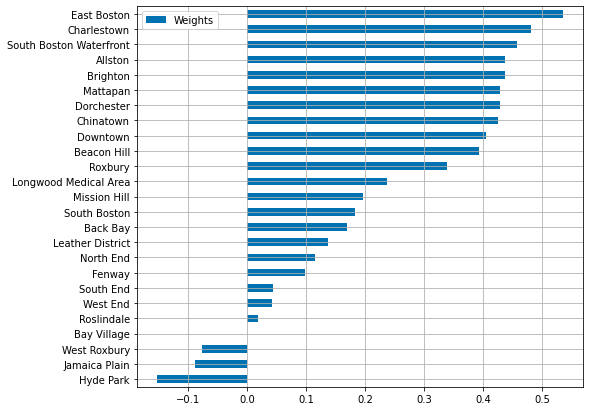

In [66]:
property_weights=linear_regressor.get_variable_value('linear/linear_model/neighbourhood_cleansed/weights')
print(property_weights)
property_weights = property_weights.flatten()
property_keys = boston['neighbourhood_cleansed'].value_counts().keys()
print(property_keys)
pd.DataFrame({'Weights':property_weights}, index=property_keys).sort_values('Weights', 
        ascending=True).plot(kind='barh', figsize=(8,7), grid=True)